In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Niklas\anaconda3\envs\PersonalVoiceAssistent\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Niklas\anaconda3\envs\PersonalVoiceAssistent\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Niklas\anaconda3\envs\PersonalVoiceAssistent\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [14]:
pd.set_option('display.max_rows', 500)

In [2]:
def genereate_test_data(input_arr):
    data_arr = list()
    for intent_arr in input_arr:
        for intent_dict in intent_arr:
            intent_entitiy_string = np.nan
            payload = {'text': intent_dict['input_text']}
            headers = {'content-type': 'application/json'}
            response = requests.post('http://localhost:5000/model/parse', json=payload, headers=headers).content
            my_json = response.decode('utf8').replace("'", '"')
            data = json.loads(my_json)
            intent_name = data['intent']['name']
            intent_confidence = data['intent']['confidence']
            entities = data['entities']
            intent_entities = set()
            for entity in entities: 
                entity_value = entity['value']
                intent_entities.add(entity_value)
            intent_entities = list(intent_entities)
            if len(intent_entities) > 0:
                intent_entitiy_string = intent_entities[0]
                if len(intent_entities) > 1:
                    for string in intent_entities[1:]:
                        intent_entitiy_string += ', ' + string
        
            single_dict = {'input_text': intent_dict['input_text'],
                              'intent_expected': intent_dict['intent_expected'],
                              'intent_identified': intent_name,
                              'intent_confidence': intent_confidence,
                              'entities_identified': intent_entitiy_string   
            }
            
            try: 
                single_dict.update({'entities_expected': intent_dict['entities_expected']})
            except:
                None
            data_arr.append(single_dict)       
    return data_arr

In [3]:
mute = 	[	{'intent_expected': 'mute', 'input_text':'mute Steffen', 'entities_expected': 'Steffen'},
       		{'intent_expected': 'mute', 'input_text':'mute Seid', 'entities_expected': 'Seid'},
       		{'intent_expected': 'mute', 'input_text':'please mute Klaus', 'entities_expected': 'Klaus'},
       		{'intent_expected': 'mute', 'input_text':'can you please mute Mozzam?', 'entities_expected': 'Mozzam'},
       		{'intent_expected': 'mute', 'input_text':'get Freddy muted please', 'entities_expected': 'Freddy'},
       		{'intent_expected': 'mute', 'input_text':'mute Hoa and Niklas', 'entities_expected': 'Hoa, Niklas'}	]

wake_up = [	{'intent_expected': 'wake_up', 'input_text':'hey bbb'},
			{'intent_expected': 'wake_up', 'input_text':'hey big blue button'},
			{'intent_expected': 'wake_up', 'input_text':'whats up my friend bbb'},
			{'intent_expected': 'wake_up', 'input_text':'hello bbb'},
			{'intent_expected': 'wake_up', 'input_text':'hey big blue botton'}	]
    
summarize = [	{'intent_expected': 'summarize', 'input_text':'make a summary'},
				{'intent_expected': 'summarize', 'input_text':'summarize the meeting'},
				{'intent_expected': 'summarize', 'input_text':'get me the summary of the meeting now'},
				{'intent_expected': 'summarize', 'input_text':'can I have the summary please'},
				{'intent_expected': 'summarize', 'input_text':'make me a summarization please'}	]

give_presenter = [	{'intent_expected': 'give_presenter', 'input_text':'give Mike presenter', 'entities_expected': 'Mike'},
					{'intent_expected': 'give_presenter', 'input_text':'give me presenter', 'entities_expected': 'me'},
					{'intent_expected': 'give_presenter', 'input_text':'let me presenter', 'entities_expected': 'me'},
					{'intent_expected': 'give_presenter', 'input_text':'make Sonya present now please', 'entities_expected': 'Sonya'},
					{'intent_expected': 'give_presenter', 'input_text':'let myself be presenter', 'entities_expected': 'myself'},
					{'intent_expected': 'give_presenter', 'input_text':'can I present now?', 'entities_expected': 'I'}	]

share_screen = 	[	{'intent_expected': 'share_screen', 'input_text':'share my screen please'},
					{'intent_expected': 'share_screen', 'input_text':'please share my screen'},
					{'intent_expected': 'share_screen', 'input_text':'can you share my screen now?'},
					{'intent_expected': 'share_screen', 'input_text':'is there a way to share my screen?'},
					{'intent_expected': 'share_screen', 'input_text':'can you share nmy screen please?'}	]

raise_hand = 	[	{'intent_expected': 'raise_hand', 'input_text':'raise my hand'},
					{'intent_expected': 'raise_hand', 'input_text':'raise my hand up please'},
					{'intent_expected': 'raise_hand', 'input_text':'please raise my hand'},
					{'intent_expected': 'raise_hand', 'input_text':'now, raise my hand'},
					{'intent_expected': 'raise_hand', 'input_text':'raise my hands now'}	]

out_of_scope = 	[		{'intent_expected': 'out_of_scope', 'input_text':'I dont like it here'},
						{'intent_expected': 'out_of_scope', 'input_text':'Can you here me?'},
						{'intent_expected': 'out_of_scope', 'input_text':'ahh I dont know that'},
						{'intent_expected': 'out_of_scope', 'input_text':'the accuracy of this model is not that great to be honest'},
						{'intent_expected': 'out_of_scope', 'input_text':'how can I share my screen?'}	]


wake_up_give_presenter = [	{'intent_expected': 'wake_up+give_presenter', 'input_text':'hello bbb give Mike presenter', 'entities_expected': 'Mike'},
							{'intent_expected': 'wake_up+give_presenter', 'input_text':'hey bbb give me presenter', 'entities_expected': 'me'},
							{'intent_expected': 'wake_up+give_presenter', 'input_text':'hey big blue button let me presenter', 'entities_expected': 'me'},
							{'intent_expected': 'wake_up+give_presenter', 'input_text':'whats up my friend bbb make Sonya present now please', 'entities_expected': 'Sonya'},
							{'intent_expected': 'wake_up+give_presenter', 'input_text':'hey big blue botton let myself be presenter', 'entities_expected': 'myself'}	]

wake_up_share_screen = 	[	{'intent_expected': 'wake_up+share_screen', 'input_text':'hello bbb share my screen please'},
							{'intent_expected': 'wake_up+share_screen', 'input_text':'hey bbb please share my screen'},
							{'intent_expected': 'wake_up+share_screen', 'input_text':'hey big blue button can you share my screen now?'},
							{'intent_expected': 'wake_up+share_screen', 'input_text':'whats up my friend bbb is there a way to share my screen?'},
							{'intent_expected': 'wake_up+share_screen', 'input_text':'hey big blue botton can you share nmy screen please?'}]


wake_up_raise_hand = 	[	{'intent_expected': 'wake_up+raise_hand', 'input_text':'hello bbb raise my hand'},
							{'intent_expected': 'wake_up+raise_hand', 'input_text':'hey bbb raise my hand up please'},
							{'intent_expected': 'wake_up+raise_hand', 'input_text':'hey big blue button please raise my hand'},
							{'intent_expected': 'wake_up+raise_hand', 'input_text':'whats up my friend bbb now, raise my hand'},
							{'intent_expected': 'wake_up+raise_hand', 'input_text':'hey big blue botton raise my hands now'}	]


wake_up_mute = 	[	{'intent_expected': 'wake_up+mute', 'input_text':'hey bbb mute Steffen', 'entities_expected': 'Steffen'},
					{'intent_expected': 'wake_up+mute', 'input_text':'hey big blue button mute Seid', 'entities_expected': 'Seid'},
					{'intent_expected': 'wake_up+mute', 'input_text':'whats up my friend bbb please mute Klaus', 'entities_expected': 'Klaus'},
					{'intent_expected': 'wake_up+mute', 'input_text':'hello bbb can you please mute Mozzam?', 'entities_expected': 'Mozzam'},
					{'intent_expected': 'wake_up+mute', 'input_text':'hey big blue botton mute Hoa and Niklas', 'entities_expected': 'Hoa, Niklas'}	]


wake_up_summarize = 	[	{'intent_expected': 'wake_up+summarize', 'input_text':'hey bbb make a summary'},
							{'intent_expected': 'wake_up+summarize', 'input_text':'hey big blue button summarize the meeting'},
							{'intent_expected': 'wake_up+summarize', 'input_text':'whats up my friend bbb get me the summary of the meeting now'},
							{'intent_expected': 'wake_up+summarize', 'input_text':'hello bbb can I have the summary please'},
							{'intent_expected': 'wake_up+summarize', 'input_text':'hey big blue botton make me a summarization please'}	]


wake_up_out_of_scope = 	[	{'intent_expected': 'wake_up+out_of_scope', 'input_text':'hey bbb I dont like it here'},
							{'intent_expected': 'wake_up+out_of_scope', 'input_text':'hey big blue button Can you here me?'},
							{'intent_expected': 'wake_up+out_of_scope', 'input_text':'whats up my friend bbb ahh I dont know that'},
							{'intent_expected': 'wake_up+out_of_scope', 'input_text':'hello bbb the accuracy of this model is not that great to be honest'},
							{'intent_expected': 'wake_up+out_of_scope', 'input_text':'hey big blue botton how can I share my screen?'}	]


In [4]:
input_arr = list()
input_arr.extend([mute, wake_up, summarize, give_presenter,
                  share_screen, raise_hand, out_of_scope,
                  wake_up_give_presenter, wake_up_share_screen,
                  wake_up_raise_hand, wake_up_mute,
                  wake_up_summarize, wake_up_out_of_scope
                ])

In [5]:
data = genereate_test_data(input_arr)

In [6]:
df = pd.DataFrame(data)

In [15]:
df = df.fillna('')
df['right_intent'] = np.where(df['intent_identified'] == df['intent_expected'], 'true', 'false')
df['right_entities'] = np.where(df['entities_identified'] == df['entities_expected'], 'true', 'false')
df = df.reindex(columns=['input_text', 'intent_identified', 'intent_expected', 'entities_identified', 'entities_expected', 'intent_confidence', 'right_intent', 'right_entities'])
df

,input_text,intent_identified,intent_expected,entities_identified,entities_expected,intent_confidence,right_intent,right_entities
0,mute Steffen,mute,mute,Steffen,Steffen,0.808693,true,true
1,mute Seid,mute,mute,Seid,Seid,0.810522,true,true
2,please mute Klaus,wake_up+mute,mute,Klaus,Klaus,0.339917,false,true
3,can you please mute Mozzam?,out_of_scope,mute,Mozzam,Mozzam,0.295562,false,true
4,get Freddy muted please,give_presenter,mute,Freddy,Freddy,0.370550,false,true
5,mute Hoa and Niklas,wake_up+mute,mute,"Hoa, Niklas","Hoa, Niklas",0.371082,false,true
6,hey bbb,wake_up,wake_up,,,0.453149,true,true
7,hey big blue button,wake_up,wake_up,,,0.419877,true,true
8,whats up my friend bbb,wake_up,wake_up,,,0.298035,true,true
9,hello bbb,wake_up,wake_up,,,0.454918,true,true


## How many intents are identified falsely?

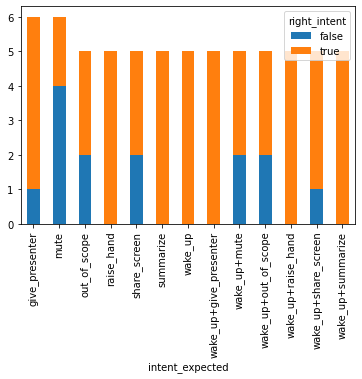

In [8]:
df.groupby('intent_expected').right_intent.value_counts().unstack().plot(kind='bar', stacked=True)

## How many entities are identified falsely?

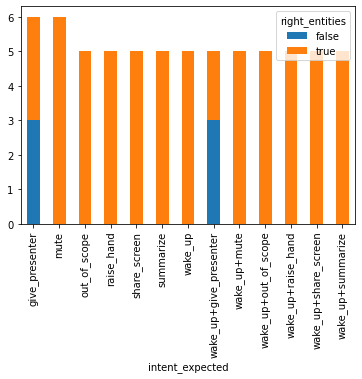

In [9]:
df.groupby('intent_expected').right_entities.value_counts().unstack().plot(kind='bar', stacked=True)

## What is the confidence of all my input texts?

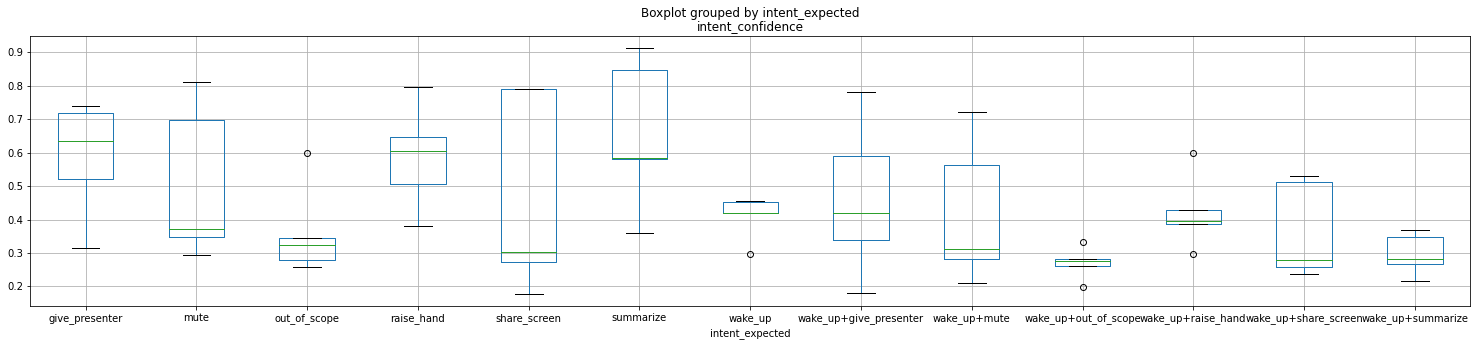

In [10]:
df.boxplot(column=['intent_confidence'], by='intent_expected', figsize=(25,5))

## What is the confidence of all my input texts where the intent is identified falsely?

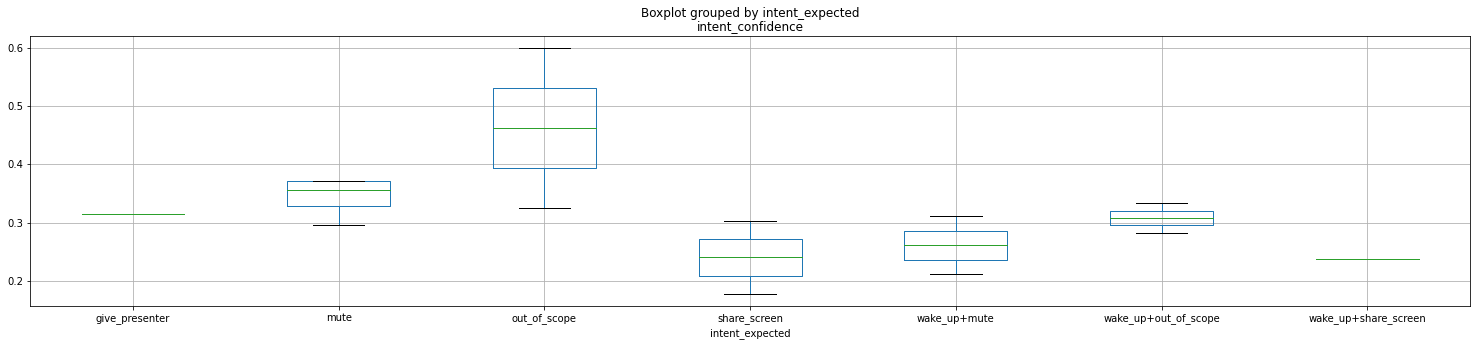

In [11]:
df[df['right_intent']=='false'].boxplot(column=['intent_confidence'], by='intent_expected', figsize=(25,5))

## What is the confidence of all my input texts where the intent is identified truely?

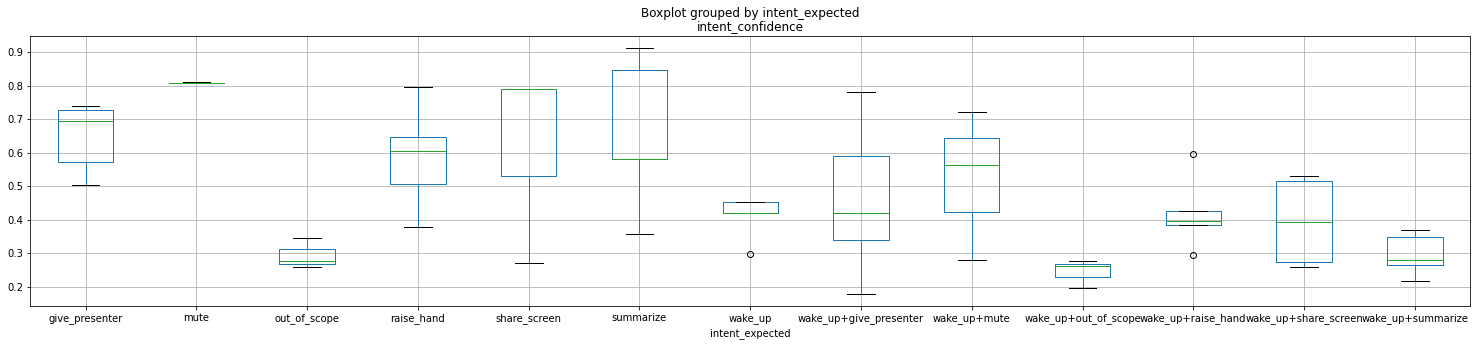

In [12]:
df[df['right_intent']=='true'].boxplot(column=['intent_confidence'], by='intent_expected', figsize=(25,5))

Findings:

The confidence of the true positives is somewhere around ~0.3 and ~0.4 which indicates that the min_confidence should be 0.3 however the confidence of false positives is somewhere around ~0.25 and ~0.35 which indicates that min_confidence should be >= 0.35 to bypass those false positives. 

Anyhow this will just be an optimum - further training should help to identify a better accuracy over all and therefore help to find a better choice for the min_confidence value